# PCA ANALYSIS NOTEBOOK

This notebook contains all implementation of the functions expressed in the PCA_implementation py file.

In [1]:
#IMPORTS
from PCA_Implementation import ScaleData, print_explained_var, plot_explained_var, compute_loadings, FindMostImportantFeature, plot_pc_loadings, Create_pc_plot
import pandas as pd

### Dataframe creation

In [2]:
#DATAFRAME THAT CONTAINS INHIBITION ABILLITY
test_df = pd.read_csv("data/tested_molecules.csv")

In [3]:
df_desc_2d = pd.read_csv("data/cleaned_2d_descriptors.csv").iloc[:,1:]
df_maccs = pd.read_csv("data/cleaned_maccs_keys.csv").iloc[:,1:]
df_fprint = pd.read_csv("data/cleaned_fingerprints.csv").iloc[:,1:]


Potential space for other dataframes to be analyzed:

In [4]:
#ADD DATAFRAME LOADING HERE.

### Setting dataframe to be PCA'd

In [5]:
#USED DATAFRAME:
pca_df = df_desc_2d

### PERFORMING DATA SCALING

In [6]:
scale_method = 'MinMax'
scaled_df = ScaleData(pca_df, mode=scale_method)

### Creating PCA object

In [7]:
import sklearn.decomposition #Creating a PCA object
pca = sklearn.decomposition.PCA(scaled_df.shape[1]) #n_components is set to reach 100% explained variance

#Fitting the PCA object to the scaled data and extracting the score data for later use
score_df = pca.fit_transform(scaled_df)

### Performing PCA Analysis

First, we print the individual and cumulative explained variance of every PC

In [8]:
print_explained_var(pca,maxpc=None)

Principal component 1 Explains 10.701771725884623 % of all variance
The total amount of explained variance for 1 Principal components equals 10.701771725884623 %
Principal component 2 Explains 8.365384863314578 % of all variance
The total amount of explained variance for 2 Principal components equals 19.0671565891992 %
Principal component 3 Explains 6.367696519850835 % of all variance
The total amount of explained variance for 3 Principal components equals 25.43485310905004 %
Principal component 4 Explains 5.965791055403423 % of all variance
The total amount of explained variance for 4 Principal components equals 31.40064416445346 %
Principal component 5 Explains 4.580121180117747 % of all variance
The total amount of explained variance for 5 Principal components equals 35.98076534457121 %
Principal component 6 Explains 4.042951415375922 % of all variance
The total amount of explained variance for 6 Principal components equals 40.02371675994713 %
Principal component 7 Explains 3.465666

Now we generate two plots containing these individual and cumulative explained variance

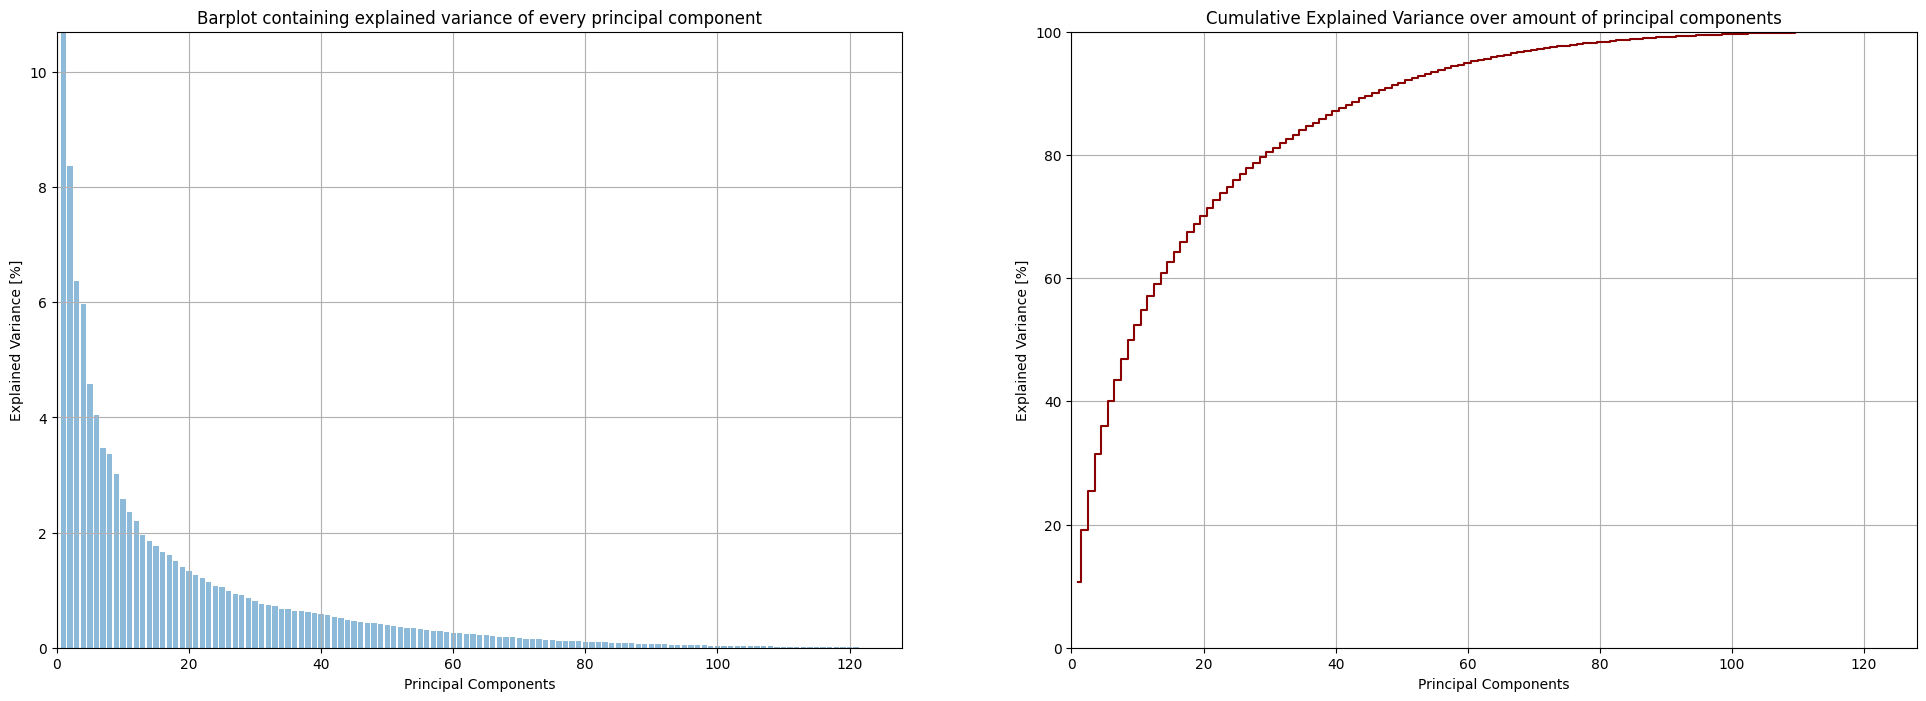

In [9]:
plot_explained_var(pca,maxpc=None)

After this, we compute the loadings of every feature of a certain PC

In [10]:
loadings_array = compute_loadings(pca)

These loadings can then be used to determine the most relevant feature to a chosen PC

In [12]:
pc_num = 1 #CHOOSE PRINCIPAL COMPONENT TO BE ANALYZED
print(type(scaled_df))
important_ft = FindMostImportantFeature(pca_df,loadings_array,pc_num)

<class 'pandas.core.frame.DataFrame'>
['MaxAbsEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'MaxPartialCharge', 'MinPartialCharge', 'FpDensityMorgan1', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'AvgIpc', 'BalabanJ', 'HallKierAlpha', 'Ipc', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA7', 'SlogP_VSA8', 'TPSA', 'EState_VSA1', 'EState_VSA10', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState7', 'VSA_EState8', 'VSA_EState9',

Furthermore, the loadings can also be plotted

In [13]:
#SETTING PC'S TO BE DEPICTED ON X AND Y AXIS OF LOADINGS PLOT
x_pc = 1
y_pc = 2

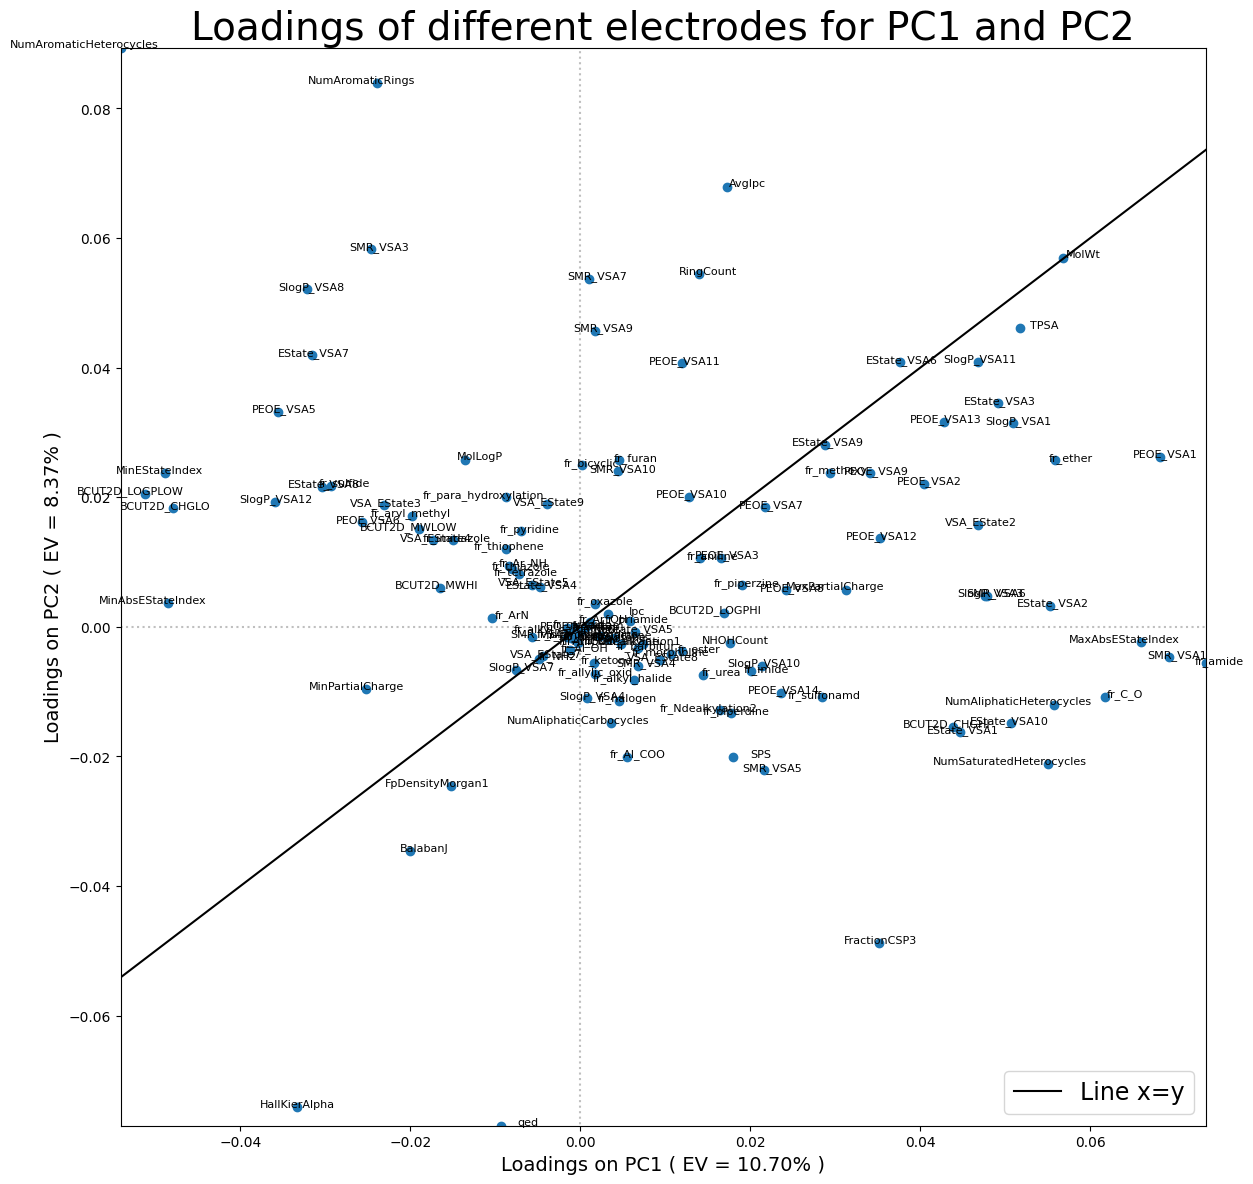

In [15]:
plot_pc_loadings(pca_df,pca,loadings_array,x_pc, y_pc)

Lastly, the earlier computed PC scores can be plotted to find any distinct groups:

In [14]:
#SETTING PC'S TO BE DEPCITED ON X AND Y AXIS OF THE SCORES PLOT
pcx = 1
pcy = 2

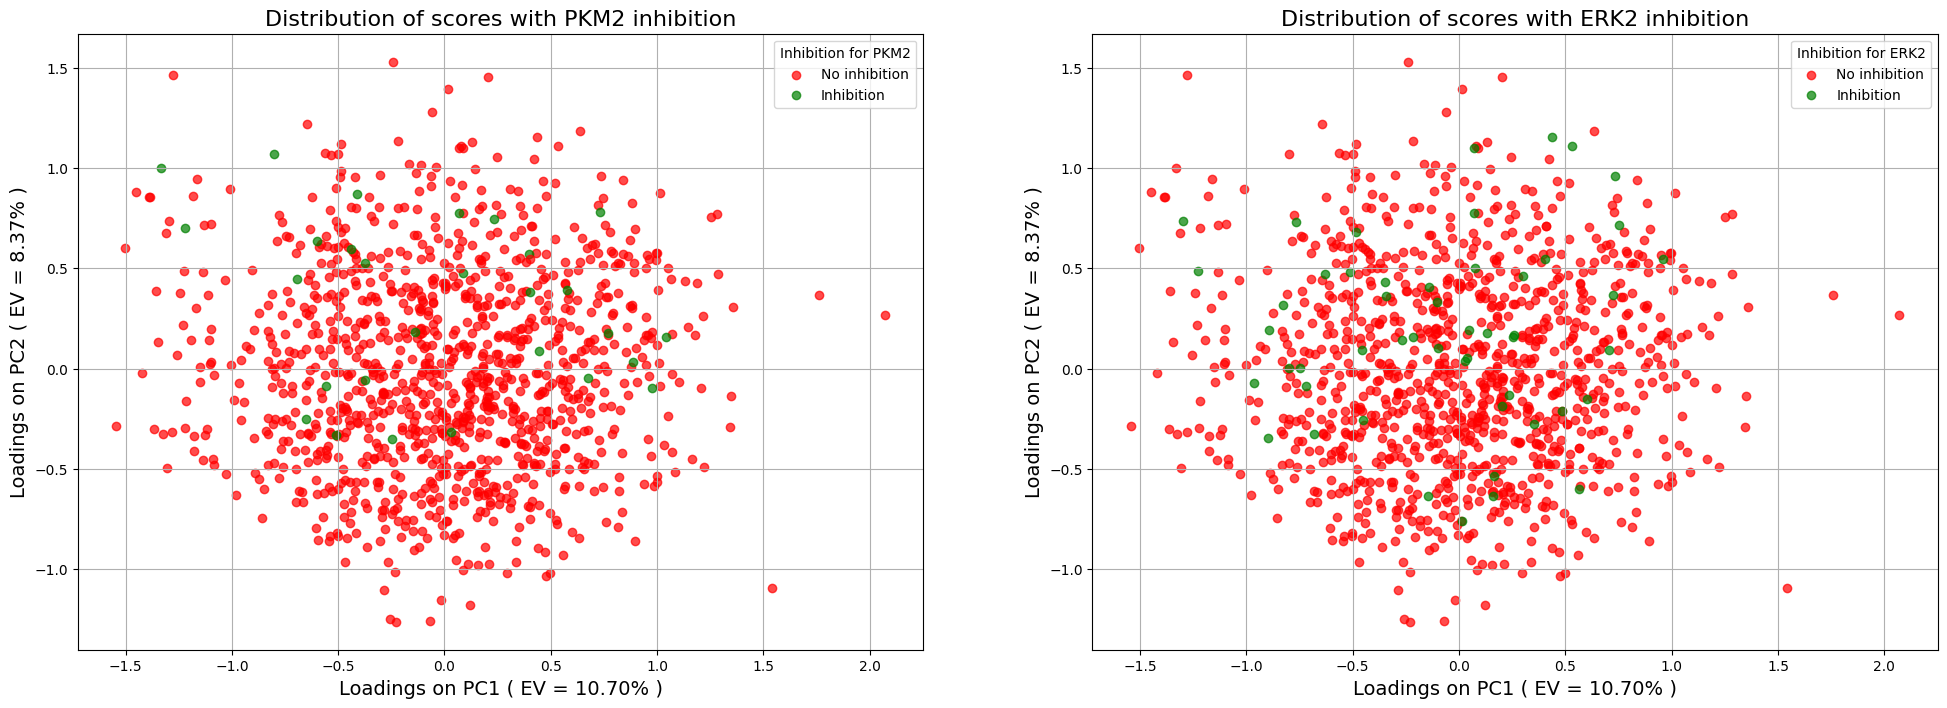

In [15]:
#color codes and label codes can be changed to result in different plot/legend
Create_pc_plot(pca, pcx, pcy, score_df,test_df,color_codes = {0:'red',1:'green'},
                   label_codes= {0:'No inhibition',1:'Inhibition'}, saveIMG=False, Filename='plot.png')